In [0]:
# !pip uninstall tensorflow==2.0.0

In [2]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 80kB/s 
     |████████████████████████████████| 3.2MB 35.3MB/s 
     |████████████████████████████████| 491kB 40.7MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [3]:
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [4]:
!pip install keras-rl

     |████████████████████████████████| 40kB 2.5MB/s 
  Created wheel for keras-rl: filename=keras_rl-0.4.2-cp36-none-any.whl size=48379 sha256=1f13f1a75fdc9487088dc8c3cdb2a97d46917ecc6f9a124bc755a74bc05fa8d6
  Stored in directory: /root/.cache/pip/wheels/7d/4d/84/9254c9f2e8f51865cb0dac8e79da85330c735551d31f73c894
Successfully built keras-rl


In [5]:
#===================== Import libraies=================#
import numpy as np
import gym
import matplotlib as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

Using TensorFlow backend.


In [0]:
#=========================== set env =================#
ENV_NAME = 'MountainCar-v0'
env = gym.make(ENV_NAME) # Get the environment and extract the number of actions available in the Cartpole problem
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [7]:
#=================== Create model ======================
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                48        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
!pip install pyglet==1.3.2 #--force-reinstall
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [9]:
policy = EpsGreedyQPolicy()
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10, target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-4), metrics=['mae'])

history = dqn.fit(env, nb_steps=20000, visualize=True, verbose=2)# visualize slows down training quite a lot. 




Training for 20000 steps ...


/usr/local/lib/python3.6/dist-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   200/20000: episode: 1, duration: 3.194s, episode steps: 200, steps per second: 63, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.990 [0.000, 2.000], mean observation: -0.265 [-0.599, 0.007], loss: 0.462561, mean_absolute_error: 0.451966, mean_q: 0.073036
   400/20000: episode: 2, duration: 1.149s, episode steps: 200, steps per second: 174, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.005 [0.000, 2.000], mean observation: -0.260 [-0.602, 0.007], loss: 0.441114, mean_absolute_error: 0.473975, mean_q: -0.041098
   600/20000: episode: 3, duration: 1.189s, episode steps: 200, steps per second: 168, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.005 [0.000, 2.000], mean observation: -0.261 [-0.566, 0.003], loss: 0.435431, mean_absolute_error: 0.512502, mean_q: -0.157210
   800/20000: episode: 4, duration: 1.176s, episode steps: 200, steps per second: 170, episode reward: -200.000, mean rewar

In [0]:
# print(history.history)

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['episode_reward'])
# plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                48        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


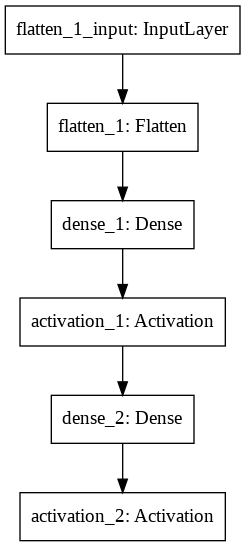

In [16]:
model.summary()
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
dqn.test(env, nb_episodes=100, visualize=False)

#===================================== end =============================#

In [0]:
#======================================== simple Random walk ========================================================#
# !pip install --force-reinstall pyglet==1.3.2
# !apt-get install -y xvfb python-opengl > /dev/null 2>&1
# !pip install gym pyvirtualdisplay > /dev/null 2>&1

import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

env = gym.make("MountainCar-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(5):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  if done:
    break
ipythondisplay.clear_output(wait=True)
env.close()